# Basic SKLearn Notebook using kmeans for Clustering Analysis

#### Template from Edx: Pythong for Data Science, UCSD, 2018

### But first, a photo of cloudy weather for inspiration

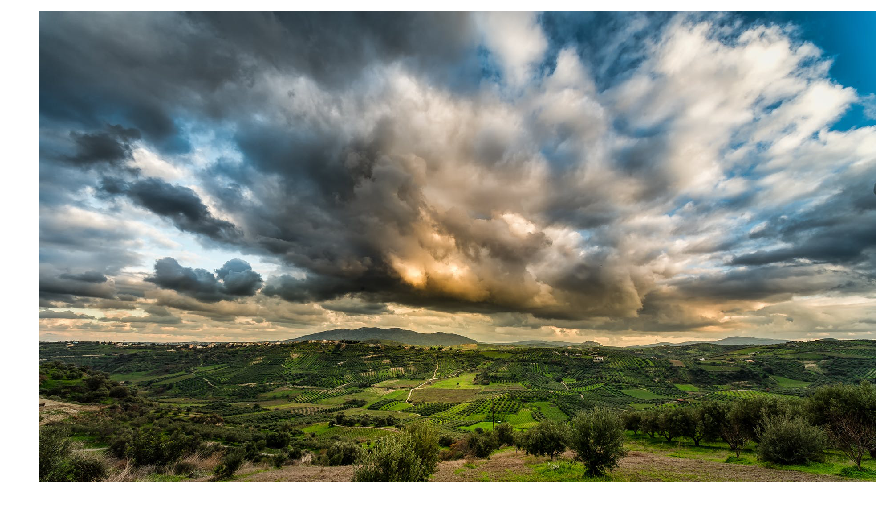

In [2]:
%matplotlib inline
import numpy as np
#from scipy import misc
import imageio
import matplotlib.pyplot as plt
from skimage import data

photo_cloudy_sky = imageio.imread('/Users/meganporter/OwnJupyterNotebooks/CloudySky.jpeg')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(photo_cloudy_sky)

# Photo by George Desipris

## Begin by Importing Libraries

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
#from pandas.tools.plotting import parallel_coordinates
from pandas.plotting import parallel_coordinates

In [4]:
min_weather_data = pd.read_csv('./weather/minute_weather.csv')

#### Weather data, courtesy of UCSD, is collected by the minute

In [5]:
min_weather_data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [6]:
min_weather_data.shape

(1587257, 13)

### Let's look at the data

In [7]:
min_weather_data

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
6,6,2011-09-10 00:06:49,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6
7,7,2011-09-10 00:07:49,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2
8,8,2011-09-10 00:08:49,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,65.8
9,9,2011-09-10 00:09:49,912.3,62.24,93.0,0.4,126.0,0.7,14.0,0.2,0.0,0.0,58.6


### Since there are over a million rows, lets pare down the data to 1/10 of that

In [9]:
one_10th_weather = min_weather_data[(min_weather_data['rowID'] % 10 == 0)]
one_10th_weather

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4
50,50,2011-09-10 00:50:49,912.1,63.68,102.0,1.2,119.0,1.5,92.0,1.0,0.0,0.0,51.4
60,60,2011-09-10 01:00:49,912.0,64.04,83.0,0.7,101.0,0.9,73.0,0.5,0.0,0.0,51.4
70,70,2011-09-10 01:10:49,911.9,64.22,82.0,2.0,97.0,2.4,69.0,1.7,0.0,0.0,62.2
80,80,2011-09-10 01:20:49,911.9,61.70,67.0,3.3,70.0,3.5,63.0,3.1,0.0,0.0,71.5
90,90,2011-09-10 01:30:49,911.9,61.34,67.0,3.6,75.0,4.2,62.0,3.1,0.0,0.0,72.5


In [10]:
one_10th_weather.shape

(158726, 13)

### Create a numerical description that is easier to read

In [12]:
one_10th_weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


### In looking at the Q1, Q2, and Q3 data for rain_accumulation and rain_duration, we can guess that most values are 0. Let's check:

In [14]:
one_10th_weather[one_10th_weather['rain_accumulation']==0].shape

(157812, 13)

In [15]:
one_10th_weather[one_10th_weather['rain_duration'] == 0].shape

(157237, 13)

### It's okay to drop those rows since there is barely any numerical data

In [17]:
del one_10th_weather['rain_accumulation']
del one_10th_weather['rain_duration']

In [20]:
rows_before = one_10th_weather.shape[0]
one_10th_weather = one_10th_weather.dropna()
rows_after = one_10th_weather.shape[0]

In [21]:
rows_before - rows_after

46

In [23]:
# Notice that there are only 11 columns now
one_10th_weather.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [24]:
one_10th_weather.shape

(158680, 11)

## It's time to decide which characteristics to consider for clusterin analysis

In [28]:
notable_chars = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']
# Note that we left out rowID, hpwren_timestamp, min_wind_direction, and min_wind_speed

In [29]:
select_chars = one_10th_weather[notable_chars]

In [30]:
select_chars.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [31]:
select_chars

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
50,912.1,63.68,102.0,1.2,119.0,1.5,51.4
60,912.0,64.04,83.0,0.7,101.0,0.9,51.4
70,911.9,64.22,82.0,2.0,97.0,2.4,62.2
80,911.9,61.70,67.0,3.3,70.0,3.5,71.5
90,911.9,61.34,67.0,3.6,75.0,4.2,72.5


## It's important to scale the data using the SKLearn Standard Scaler

In [33]:
X = StandardScaler().fit_transform(select_chars)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

## Now we bring in kmeans

In [34]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model:\n", model)

model:
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


### Now check what the centers of the clusters are

In [35]:
the_centers = model.cluster_centers_
the_centers

array([[ 0.23406221,  0.3193414 ,  1.88793197, -0.65189853, -1.55173355,
        -0.57674535, -0.28274153],
       [-0.84008796, -1.19859064,  0.37513627,  0.35670017,  0.47357327,
         0.34464343,  1.36229697],
       [ 1.36754714, -0.08185973, -1.20715517, -0.04804462, -1.0761107 ,
        -0.0276889 , -0.97749559],
       [ 0.13183584,  0.84391115,  1.41067442, -0.63848742,  1.67473736,
        -0.58921925, -0.71396362],
       [-0.21150192,  0.63083705,  0.40841749,  0.73590671,  0.51650213,
         0.67372351, -0.14968301],
       [-1.18025097, -0.87572272,  0.44666479,  1.97750761,  0.53863065,
         1.93901051,  0.91401811],
       [ 0.05909963, -0.78728498, -1.19635119, -0.57103421, -1.0422014 ,
        -0.58554363,  0.87708859],
       [ 1.19057401, -0.25522069, -1.15497259,  2.1248264 , -1.05348098,
         2.24173171, -1.13466563],
       [-0.69323117,  0.54792749,  0.17867689, -0.5837333 ,  0.34801666,
        -0.5971197 , -0.11705155],
       [ 0.25066622, -0.9945

### Functions created to aid in plot/visualization

In [40]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [44]:
# Function that creates Parallel Plots

def parallel_plot(one_10th_data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(one_10th_data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(one_10th_data, 'prediction', color = my_colors, marker='o')

In [47]:
P = pd_centers(notable_chars, the_centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.234062,0.319341,1.887932,-0.651899,-1.551734,-0.576745,-0.282742,0
1,-0.840088,-1.198591,0.375136,0.356700,0.473573,0.344643,1.362297,1
2,1.367547,-0.081860,-1.207155,-0.048045,-1.076111,-0.027689,-0.977496,2
3,0.131836,0.843911,1.410674,-0.638487,1.674737,-0.589219,-0.713964,3
4,-0.211502,0.630837,0.408417,0.735907,0.516502,0.673724,-0.149683,4
5,-1.180251,-0.875723,0.446665,1.977508,0.538631,1.939011,0.914018,5
6,0.059100,-0.787285,-1.196351,-0.571034,-1.042201,-0.585544,0.877089,6
7,1.190574,-0.255221,-1.154973,2.124826,-1.053481,2.241732,-1.134666,7
8,-0.693231,0.547927,0.178677,-0.583733,0.348017,-0.597120,-0.117052,8
9,0.250666,-0.994589,0.659478,-0.547298,0.850619,-0.529972,1.158851,9


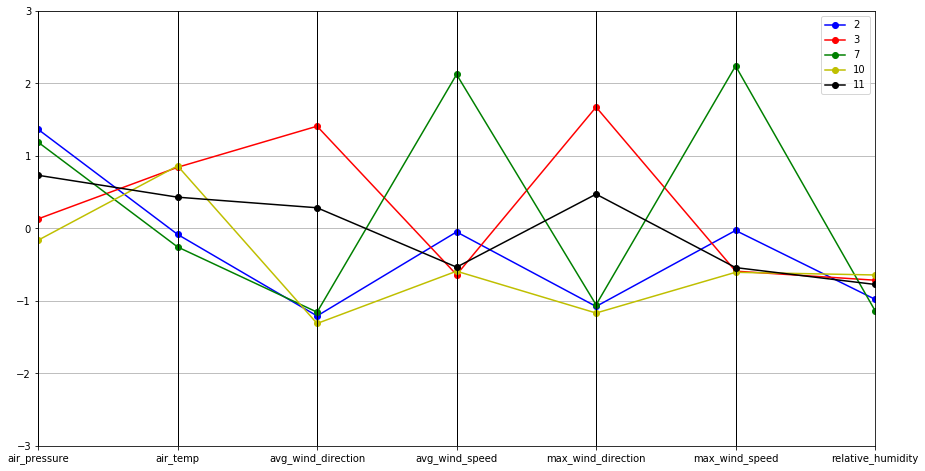

In [48]:
# Dry Days
parallel_plot(P[P['relative_humidity'] < -0.5])

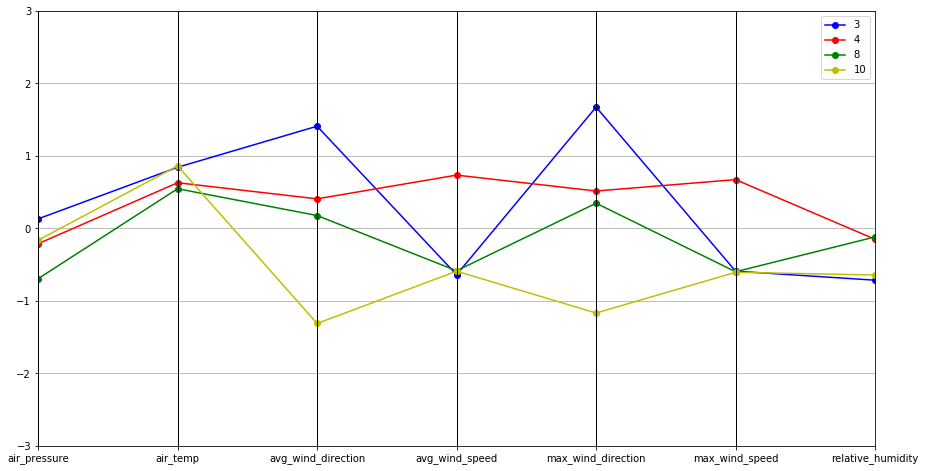

In [49]:
# Warm days
parallel_plot(P[P['air_temp'] > 0.5])

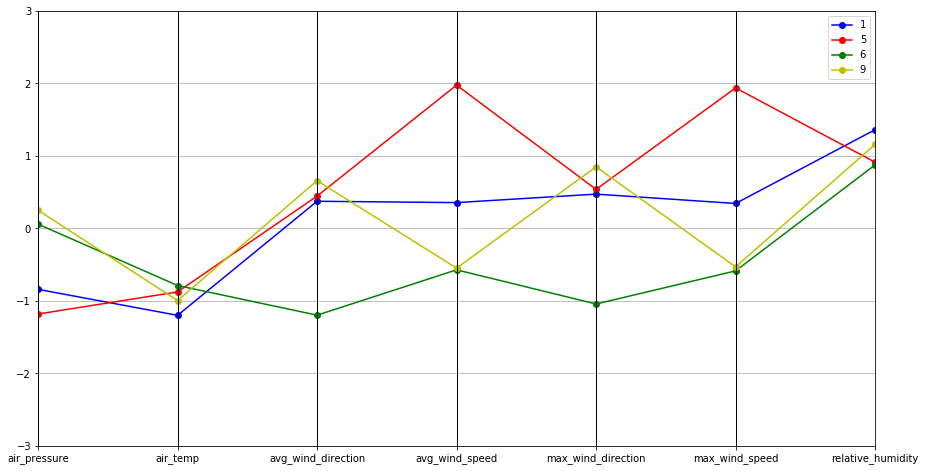

In [50]:
# Cool days
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])